# 데이터 불러오기

In [ ]:
! pip3 install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
application_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Application.csv"
job_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/Job.csv"
job_address_path = "/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/데이터 분석 중급 프로젝트_1/원본 데이터/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/JobAddress.csv"

In [ ]:
application_df = pd.read_csv(application_path)
application_df.head(2)

,Unnamed: 0,cdate,company_uuid,job_uuid,user_uuid,application_uuid
0,0,2017-02-25 23:45:01,de4b3596-b4ab-47cd-b8ea-6f9e14170064,459e461d-a571-4ed3-8751-8f4cb5b9ff37,b0329bd7-fc45-4e83-993a-b73bd9d3549c,59c42363-f764-4cbd-aafd-20eb663ea5d7
1,1,2020-11-23 14:46:07.329731,f6156b12-d4d7-469f-84be-31799c765211,e5ed4f4a-08aa-4f2d-9042-1e9bbd36803f,b0329bd7-fc45-4e83-993a-b73bd9d3549c,425db0e8-87f8-4b4d-8248-7f24c31d49d3


In [ ]:
job_df = pd.read_csv(job_path)
job_df.head(2)

,Unnamed: 0,cdate,mdate,job_field,career_type_string,start_date,end_date,allow_remote,can_show_salary,job_uuid,company_uuid
0,0,2020-11-25 10:32:10,2020-11-25 10:32:10,SW 개발,"신입,경력,인턴",NaN,2020-11-25,1,0,764292b0-53f8-4f14-ac83-6eafc7a6a18d,daa34559-fc42-47f6-b5c6-cc6171404f37
1,1,2020-12-03 16:24:16,2020-12-03 16:24:16,HW 개발,인턴,2020-12-03,2020-12-04,1,0,b2b598d6-9ca3-4eb4-ac9c-bb57a6dad2ad,daa34559-fc42-47f6-b5c6-cc6171404f37


In [ ]:
job_address_df = pd.read_csv(job_address_path)
job_address_df.head(2)

,Unnamed: 0,name,job_uuid,address
0,0,NaN,a692afc9-6e7e-4781-81b3-fcee1f67182e,고양시 동구
1,1,NaN,a7d9b044-2728-488d-a935-e323727154ce,용인시


# 지역 기반 분석

## 1. 지역별 채용공고 수

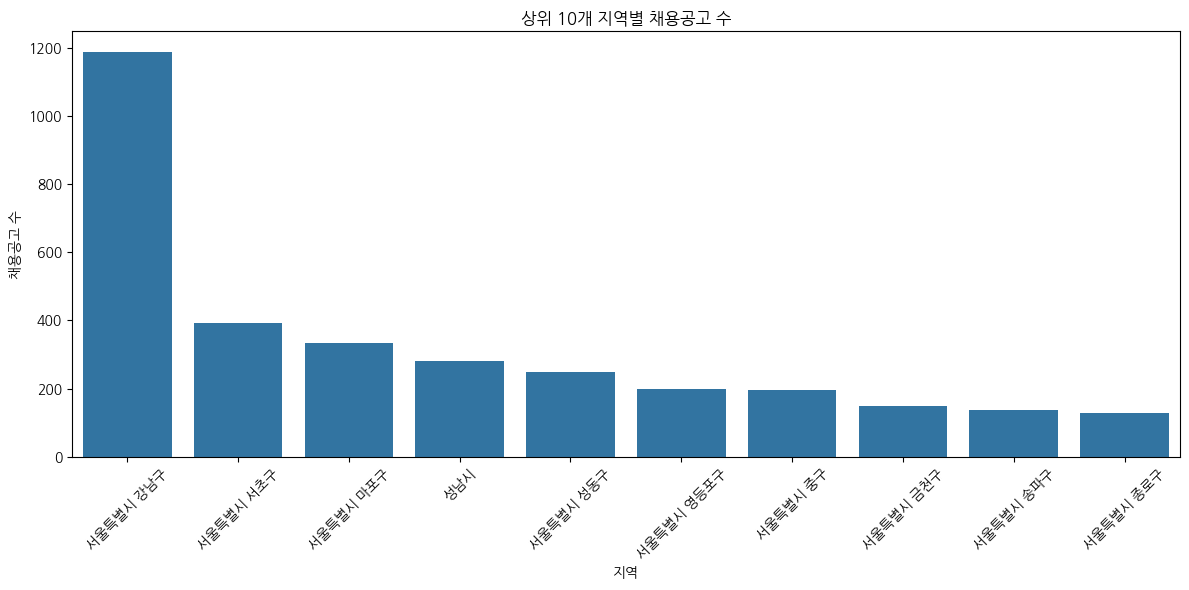

In [ ]:
# 지역별 채용공고 수
job_with_address = pd.merge(job_df[["job_uuid"]], job_address_df, on="job_uuid", how="left")
job_by_region = job_with_address["address"].value_counts().reset_index()
job_by_region.columns = ["지역", "채용공고 수"]

plt.figure(figsize=(12, 6))
sns.barplot(data=job_by_region.head(10), x="지역", y="채용공고 수")
plt.title("상위 10개 지역별 채용공고 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. 지역별 지원자 수

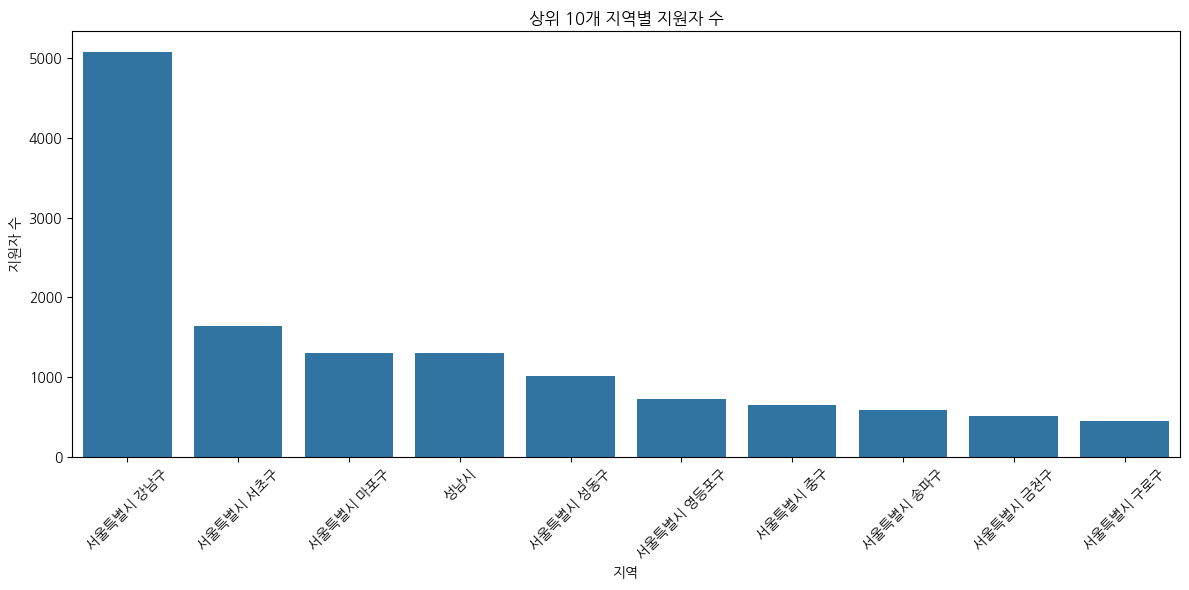

In [ ]:
# 지원 건수 + 지역 연결
applications_with_jobs = pd.merge(application_df[["job_uuid"]], job_address_df, on="job_uuid", how="left")
applications_by_region = applications_with_jobs["address"].value_counts().reset_index()
applications_by_region.columns = ["지역", "지원자 수"]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=applications_by_region.head(10), x="지역", y="지원자 수")
plt.title("상위 10개 지역별 지원자 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. 원격 근무 비율 vs 지역

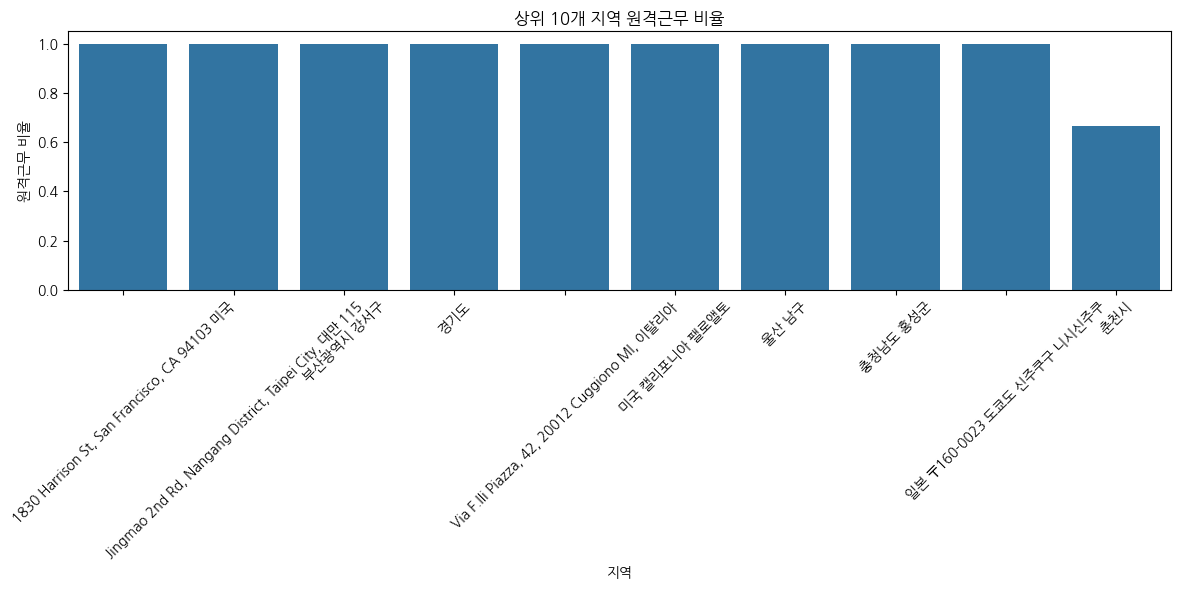

In [ ]:
# 지역별 원격 근무 비율
job_remote_info = pd.merge(job_df[["job_uuid", "allow_remote"]], job_address_df, on="job_uuid", how="left")
remote_ratio_by_region = job_remote_info.groupby("address")["allow_remote"].mean().sort_values(ascending=False).reset_index()
remote_ratio_by_region.columns = ["지역", "원격근무 비율"]

# 상위 지역 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=remote_ratio_by_region.head(10), x="지역", y="원격근무 비율")
plt.title("상위 10개 지역 원격근무 비율")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 🔍 활용 예시
    - 서울/판교 중심인지 확인 → 비수도권 캠페인 필요 여부 판단
    - 원격근무가 많은 지역 → 유연근무 특화 채용 섹션 제작 가능
    - 지원자 수 대비 공고 부족 지역 → 수요-공급 불균형 마케팅 전략